In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from dython import nominal

In [2]:
data = pd.read_csv('model_dat.csv')
data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335.0,6.0,2.0,46135
1,BMW,2011,300.0,6.0,2.0,40650
2,BMW,2011,300.0,6.0,2.0,36350
3,BMW,2011,230.0,6.0,2.0,29450
4,BMW,2011,230.0,6.0,2.0,34500
...,...,...,...,...,...,...
8614,Acura,2012,300.0,6.0,4.0,46120
8615,Acura,2012,300.0,6.0,4.0,56670
8616,Acura,2012,300.0,6.0,4.0,50620
8617,Acura,2013,300.0,6.0,4.0,50920


In [3]:
# Treating all the nominal variables at once using dummy variables
data_Numeric=data
data_Numeric.columns

Index(['Brand', 'Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Price'],
      dtype='object')

In [4]:
TargetVariable='Price'
Predictors=['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo']
data_Numeric=pd.get_dummies(data)
X=data_Numeric[Predictors].values
y=data_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeRegressor()  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
#f, axes = plt.subplots(1, 2, figsize=(12, 4))
#sb.heatmap(confusion_matrix(y_train, y_train_pred),
#           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
#sb.heatmap(confusion_matrix(y_test, y_test_pred), 
#           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9363360193284221

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8868149066995555



[Text(1383.6185257962836, 644.3648780487805, 'Horsepower <= 219.5\nmse = 173422471.069\nsamples = 6895\nvalue = 33277.295'),
 Text(471.32121138573143, 628.4546341463415, 'Horsepower <= 165.5\nmse = 48240832.014\nsamples = 3041\nvalue = 23344.714'),
 Text(150.09928170448234, 612.5443902439025, 'Year <= 2000.5\nmse = 25625271.879\nsamples = 1231\nvalue = 18931.788'),
 Text(16.462576866010856, 596.6341463414634, 'Horsepower <= 159.0\nmse = 326754.694\nsamples = 39\nvalue = 2517.846'),
 Text(14.931174366847056, 580.7239024390244, 'Horsepower <= 136.0\nmse = 213368.471\nsamples = 36\nvalue = 2414.472'),
 Text(6.125609996655203, 564.8136585365854, 'Number of Doors <= 3.0\nmse = 73480.047\nsamples = 20\nvalue = 2169.55'),
 Text(3.0628049983276013, 548.9034146341464, 'Horsepower <= 97.0\nmse = 103120.0\nsamples = 7\nvalue = 2427.0'),
 Text(1.5314024991638007, 532.9931707317073, 'mse = 0.0\nsamples = 2\nvalue = 2000.0'),
 Text(4.594207497491402, 532.9931707317073, 'Horsepower <= 117.0\nmse = 42

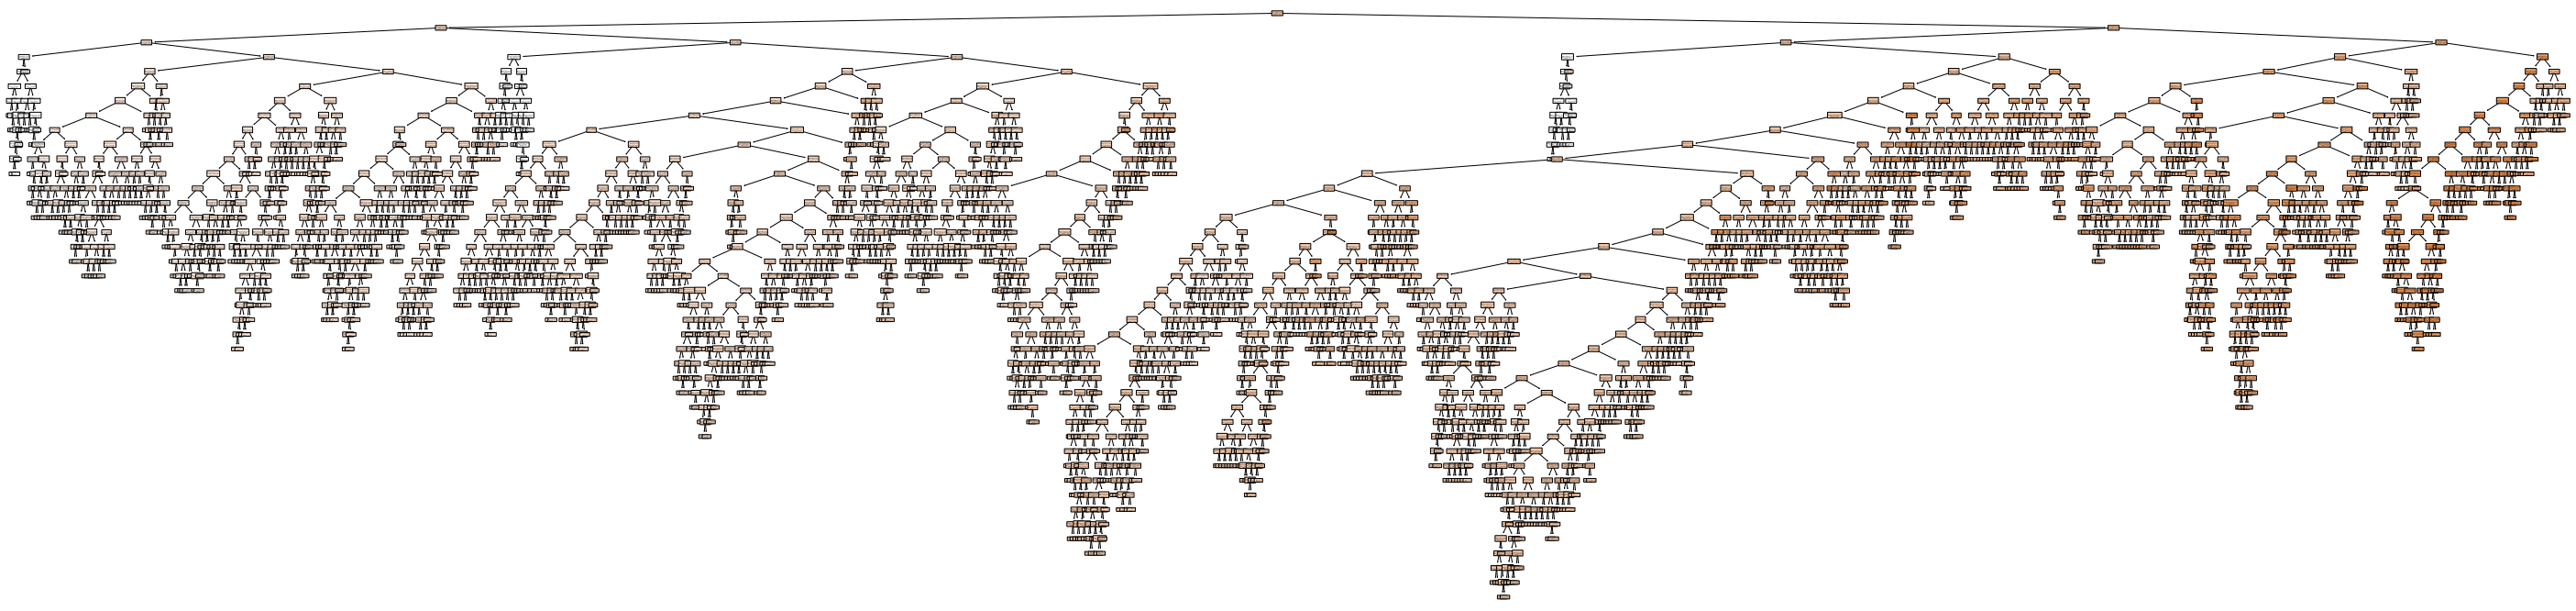

In [13]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(50,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names = Predictors, 
         class_names = TargetVariable)

In [14]:
# Print the Classification Accuracy

print("R2 \t:", dectree.score(X_train, y_train))
print("R2 \t:", dectree.score(X_test, y_test))

R2 	: 0.9363360193284221
R2 	: 0.8868149066995555
